In [5]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
from scipy.stats import norm

In [34]:
def mean_transform(unclipped_img):
    mu = np.mean(unclipped_img)
    return norm.cdf(mu) * mu + norm.pdf(mu)
def variance_transform(unclipped_img):
    mu = np.mean(unclipped_img)
    return norm.cdf(nu) + mean_transform(mu) * mu - mean_transform(mu)**2
def print_mean_std(image):
    print(f"mean : {np.mean(image):.5f}")
    print(f"std : {np.std(image):.5f}")
def print_minmax(image):
    print(f"min : {image.min():.5f}")
    print(f"max : {image.max():.5f}")
def print_metric(clean_image, noisy_image):
    print(f"PSNR : {peak_signal_noise_ratio(clean_image,noisy_image):.5f}")
    print(f"SSIM : {structural_similarity(clean_image,noisy_image):.5f}")
def standardization(image):
    return (image - np.mean(image))/np.std(image)
def y_transform(y):
    var = np.std(y)
    tilde_y = var * mean_transform(y/var) + 1 - y - var * mean_transform((1-y)/var)
    return tilde_y
# def inv_y_transform(tilde_y):
#     return tilde_y * 


In [ ]:
mu = 2
a = np.random.normal(

In [112]:
np.random.randint?

Docstring:
randint(low, high=None, size=None, dtype=int)

Return random integers from `low` (inclusive) to `high` (exclusive).

Return random integers from the "discrete uniform" distribution of
the specified dtype in the "half-open" interval [`low`, `high`). If
`high` is None (the default), then results are from [0, `low`).

.. note::
    New code should use the ``integers`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
low : int or array-like of ints
    Lowest (signed) integers to be drawn from the distribution (unless
    ``high=None``, in which case this parameter is one above the
    *highest* such integer).
high : int or array-like of ints, optional
    If provided, one above the largest (signed) integer to be drawn
    from the distribution (see above for behavior if ``high=None``).
    If array-like, must contain integer values
size : int or tuple of ints, optional
    Output shape.  If the given shape is, 

In [4]:
!ls ../data/Fivek_dataset/Fivek_test_set.mat

Fivek_test_set.mat
Fivek_train_set.hdf5
test_fivek_rawRGB_alpha_0.01_beta_0.0002.hdf5
test_fivek_rawRGB_alpha_0.01_beta_0.02.hdf5
test_fivek_rawRGB_alpha_0.05_beta_0.02.hdf5
train_fivek_rawRGB_25000x256x256_cropped_alpha_0.01_beta_0.0002.hdf5
train_fivek_rawRGB_25000x256x256_cropped_alpha_0.01_beta_0.02.hdf5
train_fivek_rawRGB_25000x256x256_cropped_alpha_0.05_beta_0.02.hdf5
Untitled.ipynb


In [7]:
fivek_dataset = sio.loadmat("../data/Fivek_dataset/Fivek_test_set.mat")
fivek_dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'noisy_images', 'clean_images', 'noisy_info'])

(512, 512)


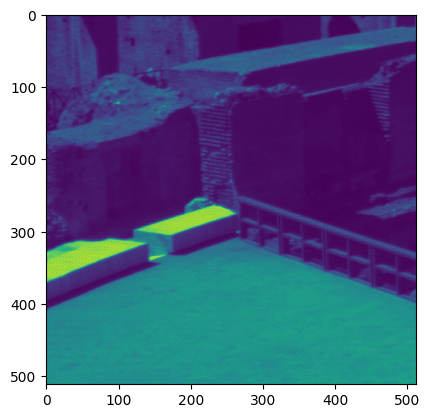

In [40]:
index = 21
print(fivek_dataset['clean_images'][index].shape)
plt.imshow(fivek_dataset['clean_images'][index])


PSNR : 37.90224097775241
SSIM : 0.990505599087136
min : 0.00000
max : 1.00000
mean : 0.23850
std : 0.23276


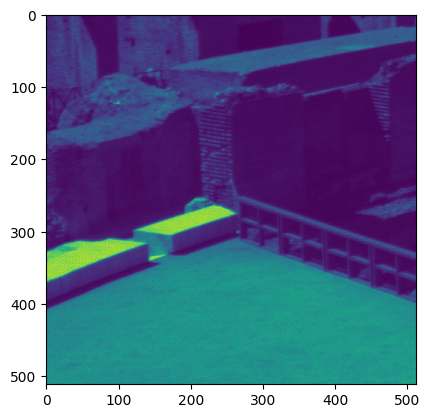

In [68]:
from skimage.metrics import structural_similarity, peak_signal_noise_ratio
print("PSNR :",peak_signal_noise_ratio(fivek_dataset['clean_images'][index], fivek_dataset['noisy_images'][index]))
print("SSIM :",structural_similarity(fivek_dataset['clean_images'][index], fivek_dataset['noisy_images'][index]))
print_minmax(fivek_dataset['noisy_images'][index])
print_mean_std(fivek_dataset['noisy_images'][index])
plt.imshow(fivek_dataset['noisy_images'][index])


In [47]:
fivek_dataset['clean_images'][index].min(), fivek_dataset['clean_images'][index].max()

(0.0024414062, 0.99365234)

min : -0.40532
max : 1.34432
mean : 0.23819
std : 0.25307


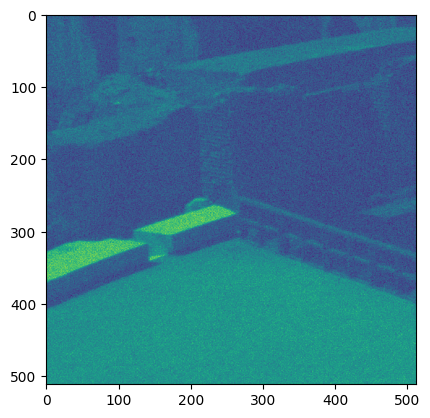

In [65]:
unclipped_images = fivek_dataset['clean_images'][index]+ 0.1*np.random.standard_normal(size=(512,512))
print_minmax(unclipped_images)
print_mean_std(unclipped_images)
plt.imshow(unclipped_images)

min : 0.00000
max : 1.34432
mean : 0.24912
std : 0.23982


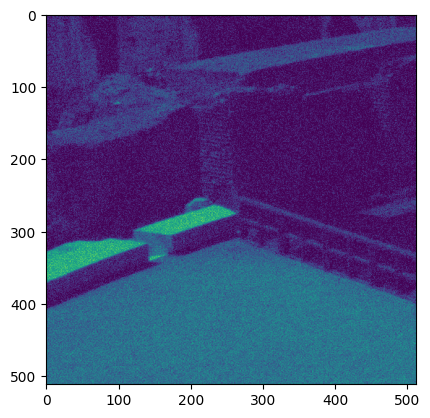

In [85]:
clipped_img = np.clip(unclipped_images,0,None)
print_minmax(clipped_img)
print_mean_std(clipped_img)
plt.imshow(clipped_img)

In [100]:
a = np.random.standard_normal(size=(512,512))
b = np.clip(a,0,None)
print_minmax(a)
print_mean_std(a)
print('-======')
print_minmax(b)
print_mean_std(b)

min : -4.61242
max : 4.74879
mean : -0.00065
std : 0.99977
-======
min : 0.00000
max : 4.74879
mean : 0.39880
std : 0.58314


In [110]:
print_minmax(y_transform(a))

min : -4.43407
max : 4.92714


In [111]:
mean_transform(a) 

0.39861685269323

min : -0.84448
max : 0.90515
mean : 0.26165
std : 0.25307


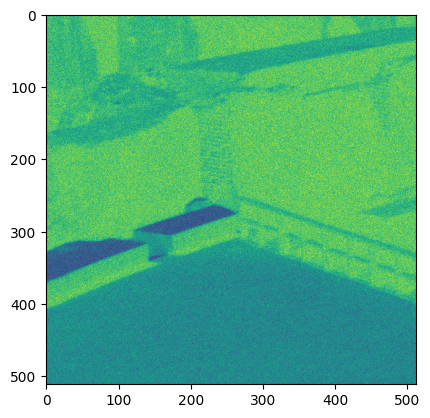

In [106]:
tilde_y = y_transform(unclipped_images)
print_minmax(tilde_y)
print_mean_std(tilde_y)
plt.imshow(tilde_y)

In [74]:
clean_img = fivek_dataset['clean_images'][index]
scaled_clean_img = std_transform(clean_img)
scaled_tilde_y = std_transform(tilde_y)
print_metric(scaled_clean_img, scaled_tilde_y)                                                     

/tmp/ipykernel_25469/2709592757.py:8: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print(f"PSNR : {peak_signal_noise_ratio(clean_image,noisy_image):.5f}")


ValueError: image_true has intensity values outside the range expected for its data type. Please manually specify the data_range.

-0.8114751854698788 0.9319039303585382


In [26]:
x_axis=np.linspace(-5,5,1000)

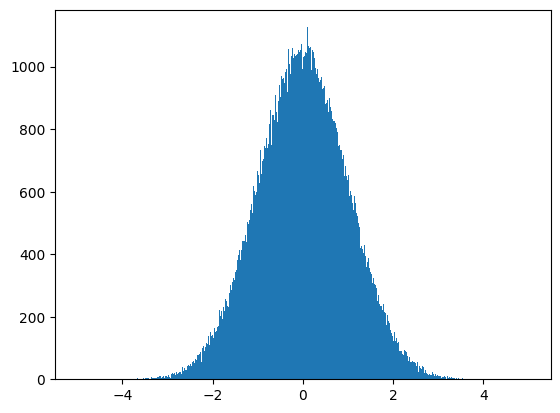

In [ ]:
nu = np.random.normal(size=(512,512))
plt.hist(bins=x_axis,x=nu.flatten())
print("")

In [ ]:
np.mean(nu), 

0.0017257501862689962

In [35]:
a = mean_transform(nu)
b = variance_transform(nu)

In [39]:
nu_tilde = np.random.normal(loc=a, scale=b, size=b.shape)
plt.hist(bins=x_axis,x=nu_tilde.flatten())

ValueError: scale < 0